In [6]:
import numpy as np
import keras
from keras.models import Sequential
#Dense means every element in a layer is connected to a previous layer
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
#to output image as png
%matplotlib inline 

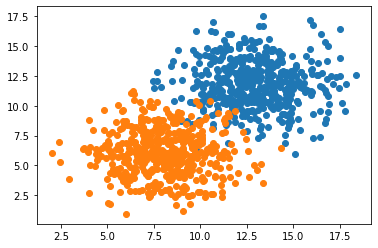

In [7]:
n_pts = 500
np.random.seed(0)

Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [9]:
model  = Sequential()

#next line deals with adding layers to the network
model.add(Dense(units=1, input_shape = (2,), activation='sigmoid' ))#1. unit=1 cuz we have 1 output node, 2.shape is no of inputs, 3. type of activation function used
adam = Adam(lr = 0.1) #lr is the learning rate
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])#binary crossentropy is the way of finding the error as used in last algorithm, here we are using binary cuz we are labelling our entire data in either 0 or 1, it helps to determine errors GOOGLE IT. accuracy calculates the accuracy of our network in correctly classifying our data
model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')#verbosity prints our progress, each time we run our entire set of data it is called epochs, since this can be massive it is divided into smaller data packets called batch_size. This is also done so we can shuffle our data so that we can avoid local maxima

Epoch 1/500
20/20 [==============================] - 0s 1ms/step - loss: 0.9595 - accuracy: 0.5509
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7486
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8668
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8914
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.9213
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.9420
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.9551
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9646
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1976 - accuracy: 0.9678
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.1827 - accuracy: 0.9658
Epoch 11/

In [ ]:
#this function takes in 1. all the points, 2. the label of those points (either 1/0 in this case),3. and the type of ML being applied. It spits out the contour of our data
def plot_decision_boundary(X,y,model):
    x_span = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 50) #select 50 equally distributed points between the lowest Xcordinate and highest Xcordinate
    y_span = np.linspace(min(X[:,1])-1, max(X[:,1])+1, 50) #""for Y; by +- 1 we are making our grid more spacious
    xx, yy = np.meshgrid(x_span, y_span) #(xx and yy are made 2d array)since we got 50 elements in xx, this func will make a 50x50 grid/matrix of that by repeating the one unique row 50 times, for the second argument, unique 50 column element of yy is repeated 50 times
    xx1D, yy1D = xx.ravel(), yy.ravel() #xx and yy are made 1d here with 50x50 elements. In xx elements are repeated after 49 other numbers in sequence, single element in yy is repeated 50 times then another element is repeated 50 times.
    grid = np.c_[xx1D, yy1D] #c_ concatenates elements in a column
    
    predictions = model.predict(grid) #it tests every points in this grid for its probability of being 1 or 0 as we labeled. ?so we are also testing the points which are not in our initial data set?
    z = predictions.reshape(xx.shape)
    
    plt.contourf(xx, yy, z)
    

In [ ]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 10,10
y = 2, 7
point = np.array([[x,y]])
predictThisPoint = model.predict(point)
plt.plot([x],[y], marker = "*", markersize=10, color="red")
print('Prediction is: ', predictThisPoint)